In [1]:
!pip install fredapi PyPortfolioOpt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 19.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 987.4/987.4 kB 49.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.8/90.8 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.3/254.3 kB 29.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.3/105.3 kB 9.4 MB/s eta 0:00:00


#### Importing necessary libraries

In [42]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.optimize import minimize
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import plotly.express as px

from pypfopt import EfficientFrontier, objective_functions
from pypfopt import black_litterman, risk_models
from pypfopt import BlackLittermanModel
from pypfopt import DiscreteAllocation

#### Defining a list of stock tickers

In [4]:
tickers = [    'AAPL',
    'MSFT',
    'META',
    'AMZN',
    'NVDA',
    'GOOGL',
    'HD',
    'ABBV',
    'KO',
    'DIS',
    'T',
    'UPS',
    'LMT',
    'CAT',
    'HSY']


#### Setting up start and end dates for data retrieval

In [5]:
end_date = datetime.today()
start_date = end_date - timedelta(days = 3*365)

#### Retrieving adjusted close prices for each ticker and storing in a DataFrame

In [6]:
adj_close_df = pd.DataFrame()
for ticker in tickers:
    data = yf.download(ticker, start = start_date,end = end_date)
    adj_close_df[ticker] = data['Adj Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [7]:
adj_close_df.head(3)

,AAPL,MSFT,META,AMZN,NVDA,GOOGL,HD,ABBV,KO,DIS,T,UPS,LMT,CAT,HSY
Date,,,,,,,,,,,,,,,
2021-02-25,118.916206,223.102142,254.420059,152.858002,132.775742,100.797501,237.287796,94.950218,45.794304,190.359589,17.263556,142.851395,314.634674,208.174332,139.024017
2021-02-26,119.181580,226.404968,257.346954,154.646500,136.836594,101.095497,240.160355,95.312904,44.717224,188.425888,16.817345,143.141602,306.432220,202.599762,137.215210
2021-03-01,125.599640,230.847702,264.629242,157.307007,138.106216,103.483002,243.209549,95.905640,45.547863,194.346603,16.937943,146.442871,309.419983,206.241028,136.781845


/Users/achyut/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/Users/achyut/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/achyut/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/achyut/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/achyut/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future

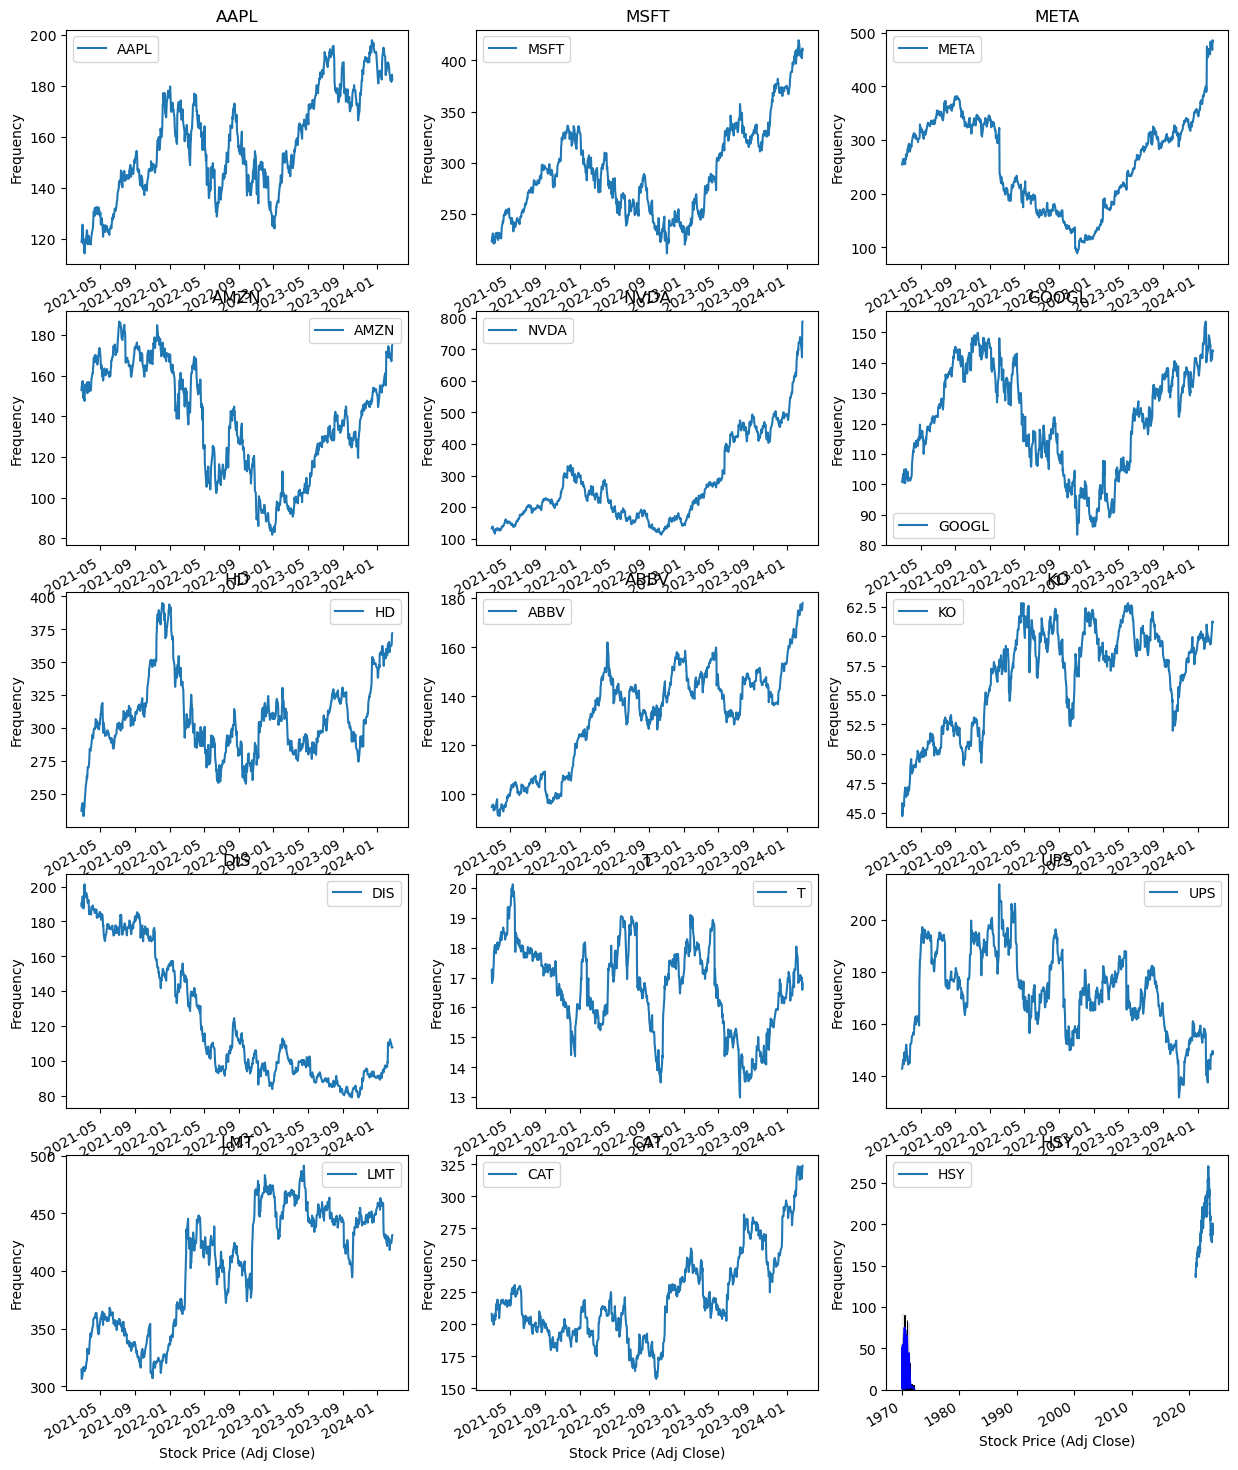

In [8]:
num_rows = 5
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))

axes = axes.flatten()

for i, ticker in enumerate(tickers):
    ax = axes[i]
    sns.histplot(adj_close_df[ticker], kde=True, color='blue', bins=30)
    adj_close_df[ticker].plot(ax=ax, label=ticker)
    ax.set_title(ticker)
    ax.set_xlabel('Stock Price (Adj Close)')
    ax.set_ylabel('Frequency')
    ax.legend()

for i in range(len(tickers), num_rows * num_cols):
    axes[i].axis('off')


#### Calculating log returns

In [9]:
log_returns = np.log(adj_close_df / adj_close_df.shift(1))
log_returns

,AAPL,MSFT,META,AMZN,NVDA,GOOGL,HD,ABBV,KO,DIS,T,UPS,LMT,CAT,HSY
Date,,,,,,,,,,,,,,,
2021-02-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-26,0.002229,0.014696,0.011439,0.011632,0.030126,0.002952,0.012033,0.003812,-0.023801,-0.010210,-0.026187,0.002029,-0.026416,-0.027143,-0.013096
2021-03-01,0.052451,0.019433,0.027905,0.017057,0.009236,0.023342,0.012617,0.006200,0.018405,0.030938,0.007145,0.022801,0.009703,0.017813,-0.003163
2021-03-02,-0.021115,-0.013042,-0.022562,-0.016540,-0.031968,-0.002506,-0.005097,-0.005179,0.004000,-0.005348,0.004617,-0.000620,0.015237,-0.018091,0.001101
2021-03-03,-0.024761,-0.027351,-0.013958,-0.029358,-0.045905,-0.026042,-0.011321,-0.010626,-0.002398,-0.008700,0.017563,-0.005842,0.006829,-0.004225,-0.006765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-16,-0.008466,-0.006168,-0.022375,-0.001709,-0.000620,-0.015885,0.003511,0.005084,-0.000168,-0.007588,-0.007046,0.020834,0.002243,-0.003597,-0.000262
2024-02-20,-0.004122,-0.003148,-0.003322,-0.014439,-0.044508,0.004261,0.000607,-0.009852,0.021818,-0.019545,-0.003542,0.001549,0.000471,-0.025707,0.012528
2024-02-21,0.004177,-0.001516,-0.006856,0.008997,-0.028923,0.010082,0.004293,-0.003477,0.008857,-0.016305,0.005308,-0.002492,0.007701,0.010779,-0.005595


#### Counting NaN values in log returns

In [10]:
log_returns.isna().sum()

AAPL     1
MSFT     1
META     1
AMZN     1
NVDA     1
GOOGL    1
HD       1
ABBV     1
KO       1
DIS      1
T        1
UPS      1
LMT      1
CAT      1
HSY      1
dtype: int64

#### Calculating mean log returns

In [11]:
log_returns.mean()

AAPL     0.000569
MSFT     0.000809
META     0.000854
AMZN     0.000180
NVDA     0.002365
GOOGL    0.000473
HD       0.000597
ABBV     0.000835
KO       0.000385
DIS     -0.000756
T       -0.000036
UPS      0.000053
LMT      0.000418
CAT      0.000587
HSY      0.000441
dtype: float64

#### Dropping NaN values from log returns

In [12]:
log_returns.dropna(inplace=True)

#### Calculating covariance matrix of log returns

In [13]:
cov_matrix = log_returns.cov() * 252
cov_matrix

,AAPL,MSFT,META,AMZN,NVDA,GOOGL,HD,ABBV,KO,DIS,T,UPS,LMT,CAT,HSY
AAPL,0.074276,0.054490,0.070047,0.061850,0.090337,0.058065,0.033649,0.009233,0.016085,0.037535,0.013592,0.032060,0.010476,0.023774,0.011461
MSFT,0.054490,0.076118,0.077507,0.069757,0.099385,0.063167,0.032955,0.008404,0.014824,0.036530,0.007004,0.030799,0.006214,0.018893,0.010009
META,0.070047,0.077507,0.240896,0.108992,0.132899,0.094798,0.045959,0.002847,0.011317,0.056938,0.015654,0.043161,0.003763,0.023496,0.004312
AMZN,0.061850,0.069757,0.108992,0.141037,0.119019,0.078728,0.042715,0.007016,0.013569,0.054325,0.015486,0.040315,0.003398,0.025636,0.006078
NVDA,0.090337,0.099385,0.132899,0.119019,0.278093,0.100912,0.053499,0.008413,0.012969,0.065408,0.005652,0.053802,0.000048,0.045719,0.002401
GOOGL,0.058065,0.063167,0.094798,0.078728,0.100912,0.098679,0.033286,0.008256,0.013496,0.040658,0.011460,0.032441,0.004809,0.022999,0.007115
HD,0.033649,0.032955,0.045959,0.042715,0.053499,0.033286,0.060893,0.010263,0.015546,0.031384,0.013338,0.032237,0.009120,0.025739,0.011069
ABBV,0.009233,0.008404,0.002847,0.007016,0.008413,0.008256,0.010263,0.041340,0.012176,0.007183,0.009193,0.011921,0.007673,0.011699,0.008480
KO,0.016085,0.014824,0.011317,0.013569,0.012969,0.013496,0.015546,0.012176,0.025401,0.012905,0.014289,0.014547,0.011470,0.011911,0.017836
DIS,0.037535,0.036530,0.056938,0.054325,0.065408,0.040658,0.031384,0.007183,0.012905,0.091916,0.021571,0.032910,0.008919,0.033638,0.007688


#### Heatmap of correlation between log returns of all assets

<Axes: >

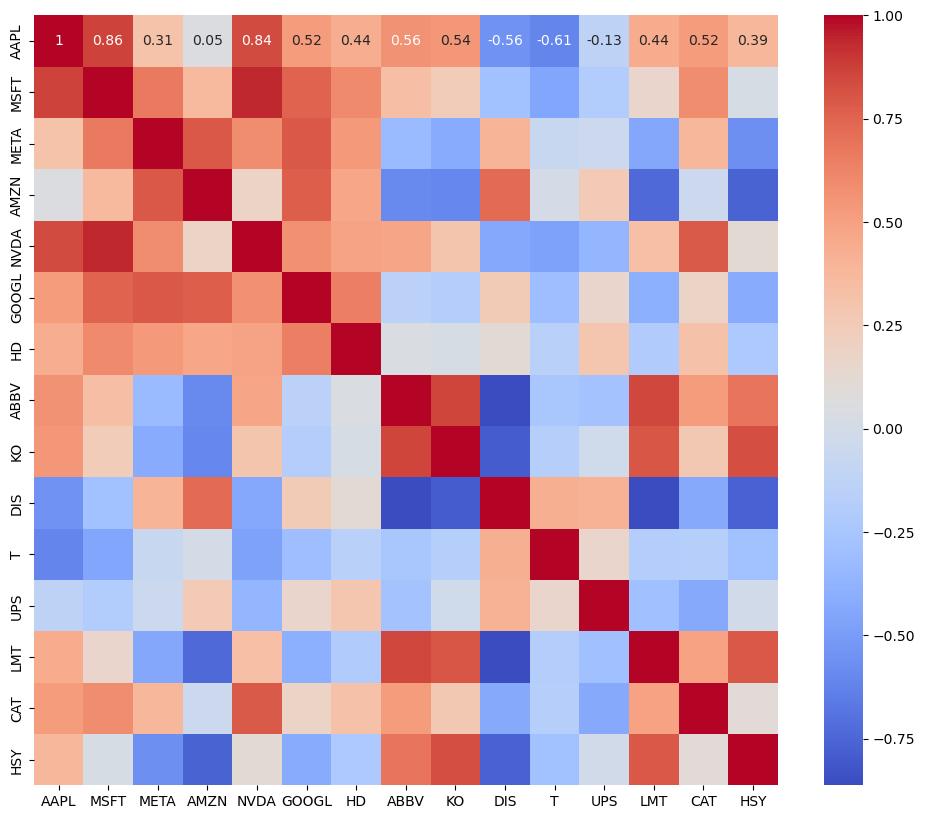

In [14]:
import matplotlib.pyplot as plt

corr_matrix = adj_close_df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

#### Defining a function to calculate standard deviation

In [15]:
def standard_deviation(weights, cov_matrix):
    variance = weights.T @ cov_matrix @ weights
    return np.sqrt(variance)

#### Defining a function to calculate expected annualized returns

In [16]:
def expected_return(weights, log_returns):
    return np.sum(log_returns.mean()*weights*252)

#### Defining a function to calculate the sharpe ratio

In [17]:
def sharpe_ratio(weights, log_returns, cov_matrix, risk_free_rate):
    return (expected_return(weights, log_returns) - risk_free_rate) / standard_deviation(weights, cov_matrix)

#### Retrieving risk-free rate from FRED API

In [18]:
from fredapi import Fred

fred = Fred(api_key='37d707ea29d05517c0f3f400b23644bb')
treasury_rate_10y = fred.get_series_latest_release('GS10')/100
risk_free_rate = treasury_rate_10y[-1]
risk_free_rate

/var/folders/t1/r4wwd84d6xb75g5c6kcczbsm0000gn/T/ipykernel_15350/2153171841.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  risk_free_rate = treasury_rate_10y[-1]


0.0406

#### Defining a function to calculate negative Sharpe ratio

In [19]:
def neg_sharpe_ratio(weights, log_returns, cov_matrix, risk_free_rate):
    return -sharpe_ratio(weights, log_returns, cov_matrix, risk_free_rate)

#### Defining constraints and bounds for optimization

In [20]:
constraints = {'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1}
bounds = [(0, 0.5) for _ in range(len(tickers))]

#### Setting initial weights for optimization

In [21]:
initial_weights = np.array([1/len(tickers)]*len(tickers))
initial_weights

array([0.06666667, 0.06666667, 0.06666667, 0.06666667, 0.06666667,
       0.06666667, 0.06666667, 0.06666667, 0.06666667, 0.06666667,
       0.06666667, 0.06666667, 0.06666667, 0.06666667, 0.06666667])

#### Optimizing portfolio weights

In [22]:
optimized_results = minimize(neg_sharpe_ratio, initial_weights, args=(log_returns, cov_matrix, risk_free_rate), method='SLSQP', constraints=constraints, bounds=bounds)
optimal_weights = optimized_results.x


#### Printing optimal weights for each ticker

In [23]:
print("Optimal Weights:")
for ticker, weight in zip(tickers, optimal_weights):
    print(f"{ticker}: {weight:.4f}")

Optimal Weights:
AAPL: 0.0000
MSFT: 0.0000
META: 0.0000
AMZN: 0.0000
NVDA: 0.2783
GOOGL: 0.0000
HD: 0.0000
ABBV: 0.5000
KO: 0.0000
DIS: 0.0000
T: 0.0000
UPS: 0.0000
LMT: 0.0878
CAT: 0.0000
HSY: 0.1339


#### Calculating expected annual return, volatility, and Sharpe ratio of the optimal portfolio

In [24]:
optimal_portfolio_return = expected_return(optimal_weights, log_returns)
optimal_portfolio_volatility = standard_deviation(optimal_weights, cov_matrix)
optimal_sharpe_ratio = sharpe_ratio(optimal_weights, log_returns, cov_matrix, risk_free_rate)

print(f"Expected Annual Return: {optimal_portfolio_return:.4f}")
print(f"Expected Volatility: {optimal_portfolio_volatility:.4f}")
print(f"Sharpe Ratio: {optimal_sharpe_ratio:.4f}")

Expected Annual Return: 0.2952
Expected Volatility: 0.1936
Sharpe Ratio: 1.3155


#### Plotting Volatility vs Returns with Sharpe Ratio

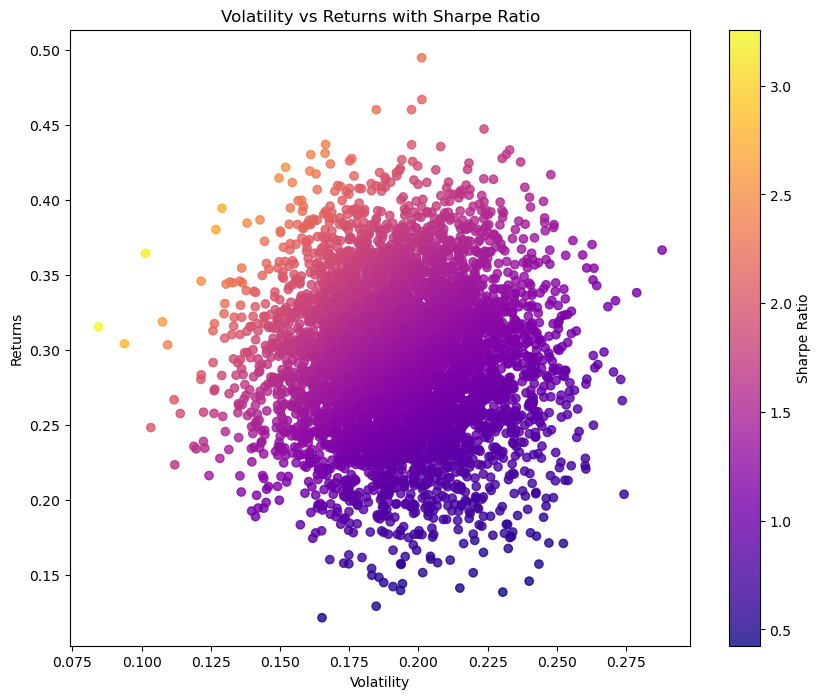

In [25]:
num_samples = 5000

volatility_samples = np.random.normal(optimal_portfolio_volatility, 0.025, num_samples)
returns_samples = np.random.normal(optimal_portfolio_return, 0.05, num_samples)
sharpe_ratio_samples = (returns_samples - risk_free_rate) / volatility_samples

plt.figure(figsize=(10,8))
plt.scatter(volatility_samples, returns_samples, c=sharpe_ratio_samples, cmap='plasma', alpha=0.8)
cbar = plt.colorbar()
cbar.set_label('Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.title('Volatility vs Returns with Sharpe Ratio')
plt.show()

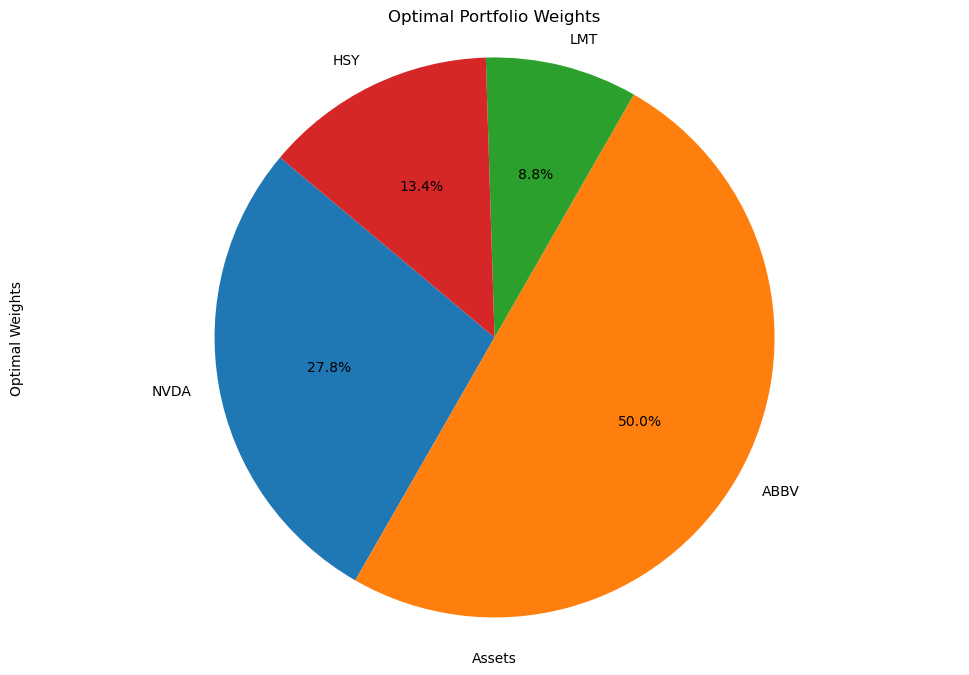

In [26]:
filtered_weights = [w for w in optimal_weights if w > 0.01]
filtered_tickers = [tickers[i] for i, w in enumerate(optimal_weights) if w > 0.01]

plt.figure(figsize=(12, 8))
plt.pie(filtered_weights, labels = filtered_tickers, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.xlabel('Assets')
plt.ylabel('Optimal Weights')
plt.title('Optimal Portfolio Weights')

plt.show()

#### Medium risk goal - Choosing the best method to maximize the weights for each asset

In [27]:
methods = ['SLSQP', 'CG', 'Nelder-Mead', 'L-BFGS-B', 'trust-constr', 'Powell']
results = {}

for method in methods:
    result = minimize(neg_sharpe_ratio, initial_weights, args=(log_returns, cov_matrix, risk_free_rate), method=method, constraints=constraints, bounds=bounds)
    optimal_weights_loop = result.x
    portfolio_return = expected_return(optimal_weights_loop, log_returns)
    portfolio_volatility = standard_deviation(optimal_weights_loop, cov_matrix)
    optimal_sharpe = sharpe_ratio(optimal_weights_loop, log_returns, cov_matrix, risk_free_rate)

    results[method] = optimal_sharpe

for method, sharpe in results.items():
    print(f"Sharpe ratio using {method}: {sharpe}")

best_method = max(results, key=results.get)
print(f"\nBest method for portfolio optimization: {best_method}")

/Users/achyut/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_minimize.py:576: RuntimeWarning: Method CG cannot handle constraints.
  warn('Method %s cannot handle constraints.' % method,
/Users/achyut/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_minimize.py:580: RuntimeWarning: Method CG cannot handle bounds.
  warn('Method %s cannot handle bounds.' % method,
/Users/achyut/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_minimize.py:576: RuntimeWarning: Method Nelder-Mead cannot handle constraints.
  warn('Method %s cannot handle constraints.' % method,
/Users/achyut/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_minimize.py:576: RuntimeWarning: Method L-BFGS-B cannot handle constraints.
  warn('Method %s cannot handle constraints.' % method,
/Users/achyut/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is li

Sharpe ratio using SLSQP: 1.3154702716025755
Sharpe ratio using CG: 2.2272031002384804
Sharpe ratio using Nelder-Mead: 1.2591607483897538
Sharpe ratio using L-BFGS-B: 1.366622371366908
Sharpe ratio using trust-constr: 1.0539964371988961
Sharpe ratio using Powell: 1.366409873907366

Best method for portfolio optimization: CG


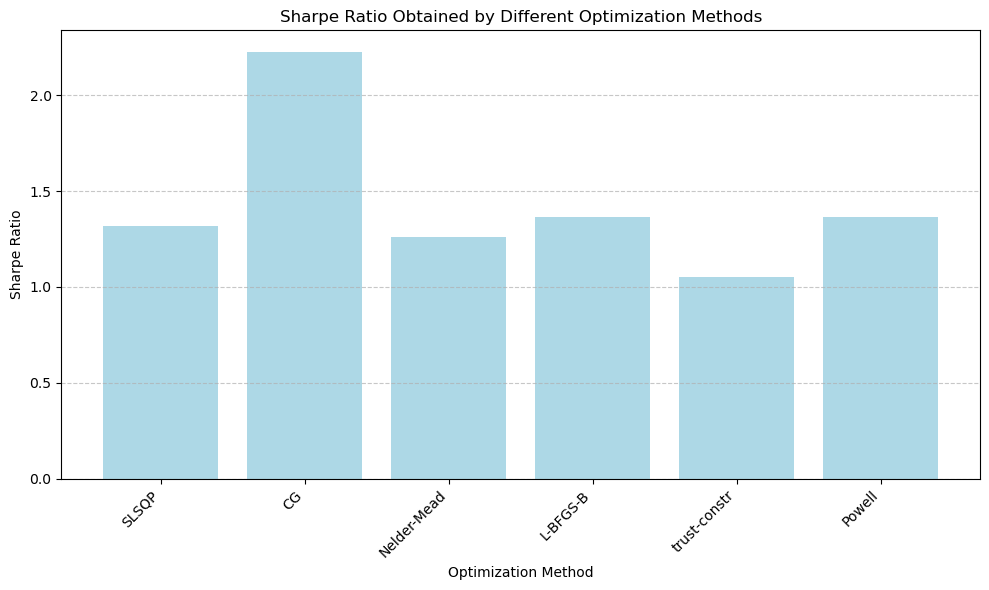

In [28]:
methods = list(results.keys())
ratios = list(results.values())

plt.figure(figsize=(10, 6))
plt.bar(methods, ratios, color='lightblue')
plt.xlabel('Optimization Method')
plt.ylabel('Sharpe Ratio')
plt.title('Sharpe Ratio Obtained by Different Optimization Methods')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Re-Computing Sharpe ratios using the most optimal (CG) method

In [29]:
optimized_results = minimize(neg_sharpe_ratio, initial_weights, args=(log_returns, cov_matrix, risk_free_rate), method='CG', constraints=constraints, bounds=bounds)
optimal_weights = optimized_results.x

/Users/achyut/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_minimize.py:576: RuntimeWarning: Method CG cannot handle constraints.
  warn('Method %s cannot handle constraints.' % method,
/Users/achyut/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_minimize.py:580: RuntimeWarning: Method CG cannot handle bounds.
  warn('Method %s cannot handle bounds.' % method,


In [30]:
print("Optimal Weights:")
for ticker, weight in zip(tickers, y):
    print(f"{ticker}: {weight:.4f}")

Optimal Weights:


NameError: name 'y' is not defined

In [31]:
optimal_portfolio_return = expected_return(optimal_weights, log_returns)
optimal_portfolio_volatility = standard_deviation(optimal_weights, cov_matrix)
optimal_sharpe_ratio = sharpe_ratio(optimal_weights, log_returns, cov_matrix, risk_free_rate)

print(f"Expected Annual Return: {optimal_portfolio_return:.2f}%")
print(f"Expected Volatility: {optimal_portfolio_volatility:.2f}%")
print(f"Sharpe Ratio: {optimal_sharpe_ratio:.4f}")

Expected Annual Return: 77.36%
Expected Volatility: 34.71%
Sharpe Ratio: 2.2272


#### Generating samples for plotting Volatility vs Returns with Sharpe Ratio

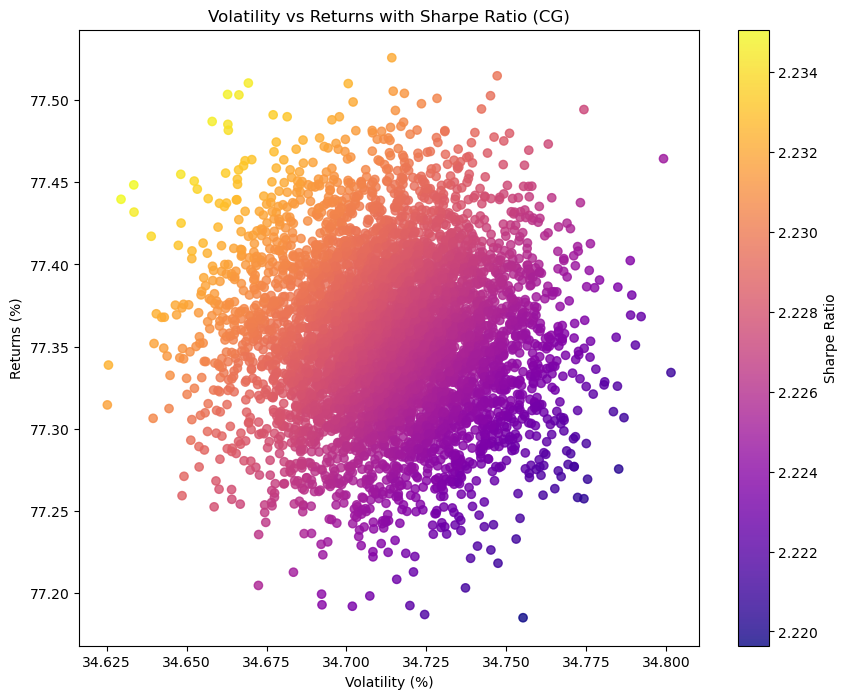

In [32]:
num_samples = 5000

volatility_samples = np.random.normal(optimal_portfolio_volatility, 0.025, num_samples)
returns_samples = np.random.normal(optimal_portfolio_return, 0.05, num_samples)
sharpe_ratio_samples = (returns_samples - risk_free_rate) / volatility_samples

plt.figure(figsize=(10,8))
plt.scatter(volatility_samples, returns_samples, c=sharpe_ratio_samples, cmap='plasma', alpha=0.8)
cbar = plt.colorbar()
cbar.set_label('Sharpe Ratio')
plt.xlabel('Volatility (%)')
plt.ylabel('Returns (%)')
plt.title('Volatility vs Returns with Sharpe Ratio (CG)')
plt.show()

#### Plotting Volatility vs Returns with Sharpe Ratio

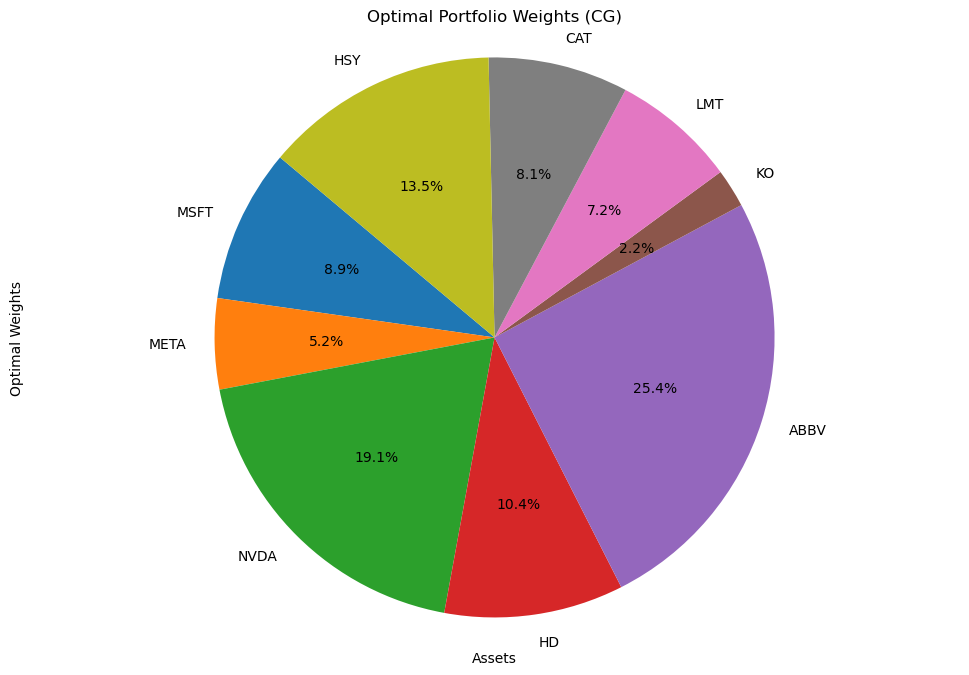

In [33]:
filtered_weights = [w for w in optimal_weights if w > 0.01]
filtered_tickers = [tickers[i] for i, w in enumerate(optimal_weights) if w > 0.01]

plt.figure(figsize=(12, 8))
plt.pie(filtered_weights, labels = filtered_tickers, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.xlabel('Assets')
plt.ylabel('Optimal Weights')
plt.title('Optimal Portfolio Weights (CG)')

plt.show()

## Black-Litterman Implementation

In [43]:
import numpy as np
import pandas as pd
import yfinance as yf
from scipy import stats
from fredapi import Fred
from pypfopt import black_litterman


avg_returns = {}
for ticker in tickers:
    prices = adj_close_df[ticker]
    returns = prices.pct_change().dropna()  # Calculate daily returns, dropping NA values
    avg_returns[ticker] = returns.mean() * 252


print("Average Returns for Each Stock:")
print(avg_returns)


# # Download market index data (e.g., S&P 500)
# market_index = '^GSPC'  # S&P 500 index ticker
# market_data = yf.download(market_index, start=start_date, end=end_date)['Adj Close']

# # Calculate excess returns for stocks and market index
# excess_returns = adj_close_df.pct_change() - risk_free_rate
# market_excess_returns = market_data.pct_change() - risk_free_rate

# # Perform linear regression for each stock
# regression_results = {}
# for ticker in tickers:
#     excess_returns_ticker = excess_returns[ticker].dropna()
#     excess_returns_market = market_excess_returns.dropna()

#     slope, intercept, r_value, p_value, std_err = stats.linregress(excess_returns_market, excess_returns_ticker)
#     regression_results[ticker] = {'slope': slope, 'intercept': intercept}
# print(regression_results)
# # Calculate expected returns using CAPM
# expected_returns = {}
# for ticker, result in regression_results.items():
#     beta = result['slope']
#     expected_returns[ticker] = risk_free_rate + beta * (market_excess_returns.mean())
# print(expected_returns)
# Calculate deviations from market-implied returns
# market_prior_returns = black_litterman.market_implied_prior_returns(tickers, market_data, risk_free_rate)
# views = {}
# for ticker, expected_return in expected_returns.items():
#     view = expected_return - market_prior_returns[ticker]
#     views[ticker] = view

# print("Regression-Derived Expected Returns:")
# print(expected_returns)
# print("\nViews (Deviation from Market Prior Returns):")
# print(views)


Average Returns for Each Stock:
{'AAPL': 0.1805415573644959, 'MSFT': 0.24204867727158733, 'META': 0.3342179389291296, 'AMZN': 0.1156476770962376, 'NVDA': 0.7368756463640944, 'GOOGL': 0.16852773837436366, 'HD': 0.18083316337876573, 'ABBV': 0.23113757226032075, 'KO': 0.10972672985945049, 'DIS': -0.14464547441374634, 'T': 0.022465190508491314, 'UPS': 0.05009714391640085, 'LMT': 0.1287479169139904, 'CAT': 0.19020431605095559, 'HSY': 0.12804929690610145}


In [44]:
market_prices = yf.download("SPY", start='2018-01-01', end='2023-02-28')["Adj Close"]
market_prices.head()

[*********************100%%**********************]  1 of 1 completed


Date
2018-01-02    243.072266
2018-01-03    244.609711
2018-01-04    245.640762
2018-01-05    247.277679
2018-01-08    247.729858
Name: Adj Close, dtype: float64

In [45]:
mcaps = {}
for t in tickers:
    stock = yf.Ticker(t)
    mcaps[t] = stock.info["marketCap"]
mcaps

{'AAPL': 2818455633920,
 'MSFT': 3049006825472,
 'META': 1233990975488,
 'AMZN': 1817691160576,
 'NVDA': 1970424905728,
 'GOOGL': 1797455872000,
 'HD': 370197659648,
 'ABBV': 314590625792,
 'KO': 263922548736,
 'DIS': 197627478016,
 'T': 120120328192,
 'UPS': 126729822208,
 'LMT': 104177131520,
 'CAT': 161738227712,
 'HSY': 39531630592}

In [46]:
S = risk_models.CovarianceShrinkage(adj_close_df).ledoit_wolf()

delta = black_litterman.market_implied_risk_aversion(market_prices)
delta

2.09070923816921

<Axes: >

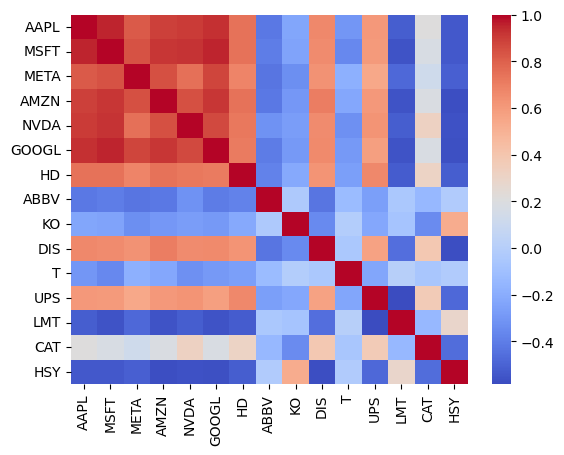

In [47]:
sns.heatmap(S.corr(), cmap='coolwarm')

In [48]:
# market_prior = black_litterman.market_implied_prior_returns(mcaps, delta, S)
# market_prior
# views = {}
# for ticker, expected_return in expected_returns.items():
#     view = expected_return - market_prior[ticker]
#     views[ticker] = view

# print("Regression-Derived Expected Returns:")
# print(expected_returns)
# print("\nViews (Deviation from Market Prior Returns):")
# print(views)

In [49]:
# market_prior.plot.barh(figsize=(10,5));

[*********************100%%**********************]  1 of 1 completed


Investor Views (Deviation from Market Prior Returns):
{'AAPL': 0.03222443640939926, 'MSFT': 0.08538637150513223, 'META': 0.11487910137477023, 'AMZN': -0.07502074579304638, 'NVDA': 0.46853967711452127, 'GOOGL': 0.0015544811728246122, 'HD': 0.08356332971772942, 'ABBV': 0.19323427702201523, 'KO': 0.060533150186612567, 'DIS': -0.2550663601486537, 'T': -0.021267747438956472, 'UPS': -0.0436186296991515, 'LMT': 0.09622128745613052, 'CAT': 0.11683128796312155, 'HSY': 0.09146986521305314}


/var/folders/t1/r4wwd84d6xb75g5c6kcczbsm0000gn/T/ipykernel_15350/4178322865.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  risk_free_rate = Fred(api_key='37d707ea29d05517c0f3f400b23644bb').get_series_latest_release('DGS10')[-1] / 100  # 10-year treasury yield


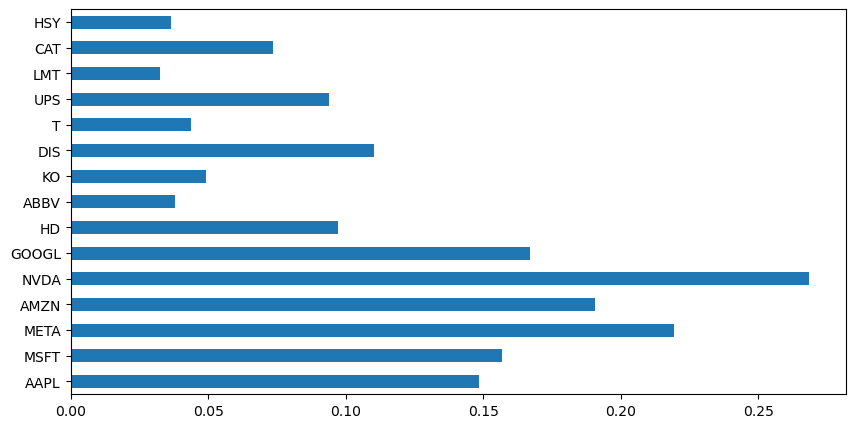

In [50]:
#You don't have to provide views on all the assets
viewdict = {
    'AAPL':0.10,
    'MSFT':0.10,
    'META':0.05,
    'AMZN':0.30,
    'NVDA':0.02,
    'GOOGL':0.01,
    'HD':0.16,
    'ABBV':0.07,
    'KO':0.01,
    'DIS':-0.23,
    'T':0.16,
    'UPS':0.10,
    'LMT':-0.09,
    'CAT':0.30,
    'HSY':-0.26
}
tickers = list(avg_returns.keys())  # Get list of tickers
market_data = yf.download('^GSPC', start=start_date, end=end_date)['Adj Close']  # Download S&P 500 data as market proxy
risk_free_rate = Fred(api_key='37d707ea29d05517c0f3f400b23644bb').get_series_latest_release('DGS10')[-1] / 100  # 10-year treasury yield
market_prior = black_litterman.market_implied_prior_returns(mcaps, delta, S)

# Calculate deviations from market-implied returns
views = {}
for ticker, avg_return in avg_returns.items():
    view = avg_return - market_prior[ticker]
    views[ticker] = view

print("Investor Views (Deviation from Market Prior Returns):")
print(views)
market_prior.plot.barh(figsize=(10,5));
viewdict= views
bl = BlackLittermanModel(S, pi=market_prior, absolute_views=viewdict)

In [51]:
intervals = [
    (0, 0.25),
    (0.1, 0.4),
    (-0.1, 0.15),
    (-0.05, 0.1),
    (0.15, 0.25),
    (-0.1, 0),
    (0.1, 0.2),
    (0.08, 0.12),
    (0.1, 0.9),
    (0, 0.3),
    (0, 0.25),
    (0.1, 0.4),
    (-0.1, 0.15),
    (-0.05, 0.1),
    (0.15, 0.25)
]

In [52]:
variances = []
for lb, ub in intervals:
    sigma = (ub - lb)/2
    variances.append(sigma ** 2)

print(variances)
omega = np.diag(variances)

[0.015625, 0.022500000000000006, 0.015625, 0.0056250000000000015, 0.0025000000000000005, 0.0025000000000000005, 0.0025000000000000005, 0.00039999999999999986, 0.16000000000000003, 0.0225, 0.015625, 0.022500000000000006, 0.015625, 0.0056250000000000015, 0.0025000000000000005]


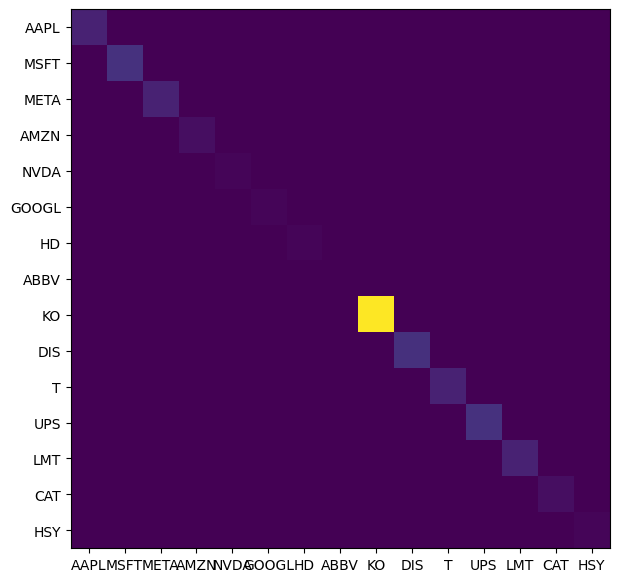

In [53]:
fig, ax = plt.subplots(figsize=(7,7))
im = ax.imshow(omega)

# We want to show all ticks...
ax.set_xticks(np.arange(len(bl.tickers)))
ax.set_yticks(np.arange(len(bl.tickers)))

ax.set_xticklabels(bl.tickers)
ax.set_yticklabels(bl.tickers)
plt.show()

In [54]:
# We are using the shortcut to automatically compute market-implied prior
# bl = BlackLittermanModel(S, pi="market", market_caps=mcaps, risk_aversion=delta, absolute_views=viewdict, omega=omega)

In [55]:
# Posterior estimate of returns
ret_bl = bl.bl_returns()
ret_bl

AAPL     0.071950
MSFT     0.087781
META     0.083022
AMZN     0.029430
NVDA     0.224896
GOOGL    0.059704
HD       0.061624
ABBV     0.110707
KO       0.055766
DIS     -0.070521
T        0.000309
UPS      0.015345
LMT      0.066200
CAT      0.070265
HSY      0.062035
dtype: float64

In [56]:
rets_df = pd.DataFrame([market_prior, ret_bl, pd.Series(viewdict)],
             index=["Prior", "Posterior", "Views"]).T
rets_df

,Prior,Posterior,Views
AAPL,0.148317,0.071950,0.032224
MSFT,0.156662,0.087781,0.085386
META,0.219339,0.083022,0.114879
AMZN,0.190668,0.029430,-0.075021
NVDA,0.268336,0.224896,0.468540
GOOGL,0.166973,0.059704,0.001554
HD,0.097270,0.061624,0.083563
ABBV,0.037903,0.110707,0.193234
KO,0.049194,0.055766,0.060533
DIS,0.110421,-0.070521,-0.255066


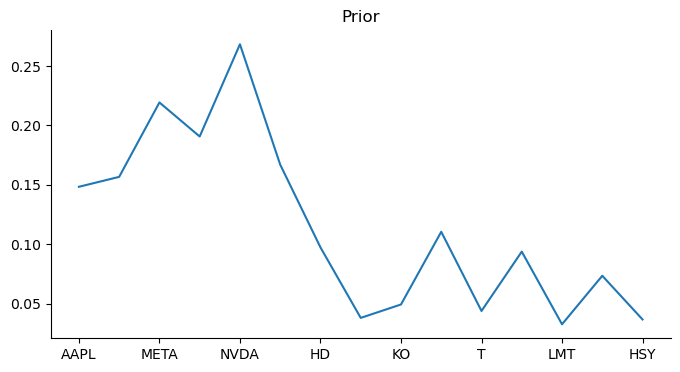

In [57]:
# @title Prior

from matplotlib import pyplot as plt
rets_df['Prior'].plot(kind='line', figsize=(8, 4), title='Prior')
plt.gca().spines[['top', 'right']].set_visible(False)

<Axes: >

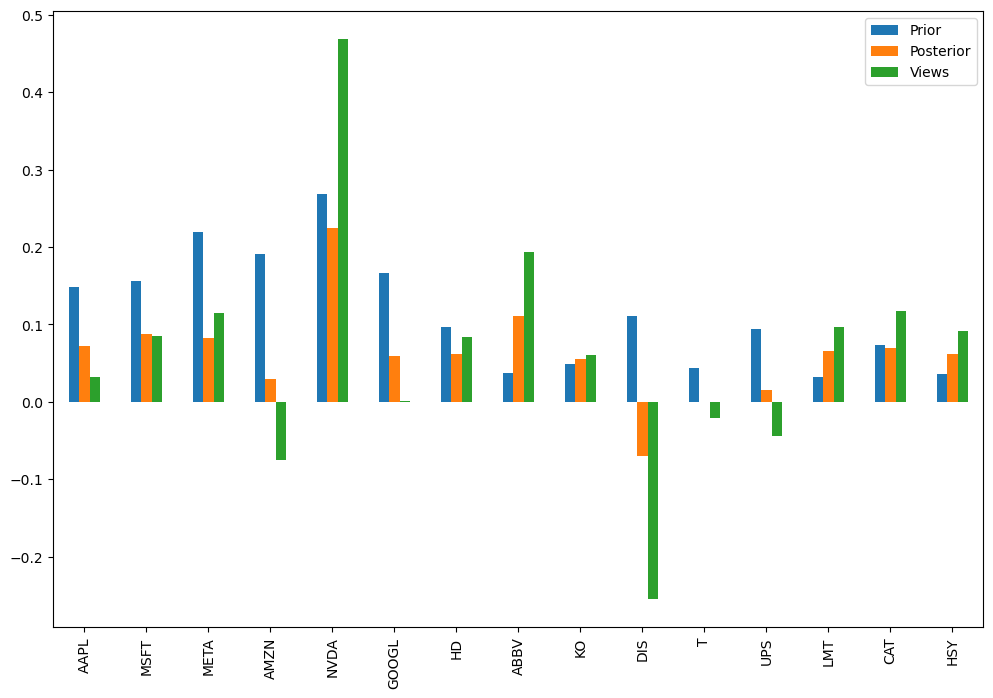

In [58]:
rets_df.plot.bar(figsize=(12,8))

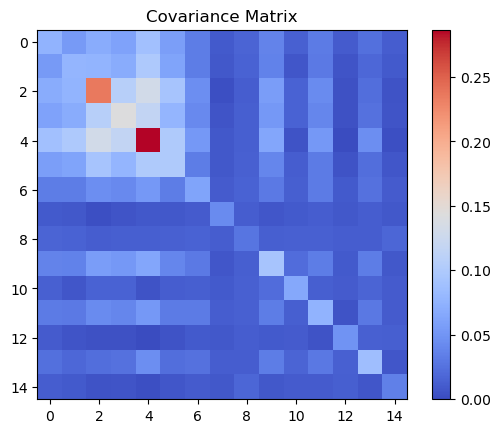

In [62]:
S_bl = bl.bl_cov()
plt.imshow(S_bl, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title('Covariance Matrix')
plt.show()

In [63]:
ef = EfficientFrontier(ret_bl, S_bl)
ef.add_objective(objective_functions.L2_reg)
ef.max_sharpe()
weights = ef.clean_weights()
weights

/Users/achyut/opt/anaconda3/lib/python3.9/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  warnings.warn(


OrderedDict([('AAPL', 0.05484),
             ('MSFT', 0.08286),
             ('META', 0.05448),
             ('AMZN', 0.0),
             ('NVDA', 0.28807),
             ('GOOGL', 0.02682),
             ('HD', 0.04967),
             ('ABBV', 0.16367),
             ('KO', 0.05618),
             ('DIS', 0.0),
             ('T', 0.0),
             ('UPS', 0.0),
             ('LMT', 0.08105),
             ('CAT', 0.06946),
             ('HSY', 0.0729)])

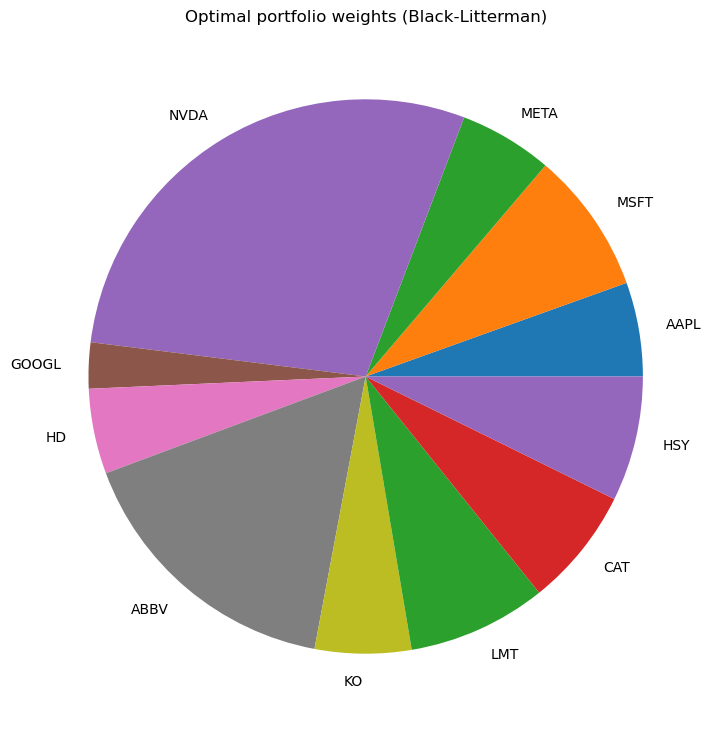

In [64]:
plt.title('Optimal portfolio weights (Black-Litterman)')
pd.Series(weights).plot.pie(figsize=(9,9));

In [ ]:
from pypfopt.plotting import plot_weights

# Maximum Sharpe
ef = EfficientFrontier(ret_bl, S_bl)
ef.add_objective(objective_functions.L2_reg)
ef.max_sharpe()
weights = ef.clean_weights()

plot_weights(weights)
ef.portfolio_performance(verbose = True, risk_free_rate = 0.009)